# Heart Disease Prediction Using ML

![alt text](Capture1.png "Workflow")

***Import the Dependencies***

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

***Data Collection and Data Preprocessing***

In [2]:
#load data as a Pandas dataframe
heart_data = pd.read_csv("heart.csv")
heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Getting the columns of the Dataset
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
heart_data.shape

(303, 14)

In [5]:
# aquiring some info of the Dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# checking the distribution of target variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Heart Disease Predicted<br>
0 --> No Heart Disease Predicted

# Graphical Visualization of Data

In [9]:
age = heart_data['age']
target = heart_data['target']

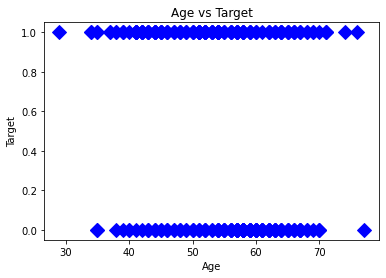

In [10]:
plt.xlabel('Age')
plt.ylabel('Target')
plt.title('Age vs Target')
plt.plot(age,target,color='blue', marker='D', linestyle='', markersize=10)

In [11]:
count = []
sex = ['male','female']
male_count = heart_data[(heart_data.sex==1) & (heart_data.target==1)].value_counts()
female_count = heart_data[(heart_data.sex==0) & (heart_data.target==1)].value_counts()
count.append(male_count.count())
count.append(female_count.count())
print(sex) 
print(count)
# plt.bar(sex,target)

['male', 'female']
[92, 72]


<BarContainer object of 2 artists>

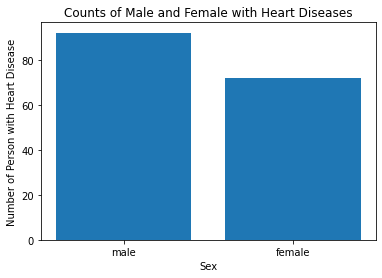

In [12]:
plt.xlabel('Sex')
plt.ylabel('Number of Person with Heart Disease')
plt.title('Counts of Male and Female with Heart Diseases')
plt.bar(sex,count) 

According to the Dataset Males have higher risk of Heart Diseases as compared to Females.

# Finding the Best Algorithm using cross_val_score

In [13]:
# Splitting the Features and Target variables
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [14]:
# LogisticRegression()
lr_score = cross_val_score(LogisticRegression(),x,y,cv=5)
# RandomForestClassifier()
rf = cross_val_score(RandomForestClassifier(),x,y,cv=5)
# Support Vector Machine
svc = cross_val_score(SVC(gamma='auto'), x,y,cv=5)

C:\Users\Aniket Purkayatha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aniket Purkayatha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [15]:
lr_score,rf,svc

(array([0.81967213, 0.86885246, 0.83606557, 0.85      , 0.75      ]),
 array([0.86885246, 0.86885246, 0.80327869, 0.81666667, 0.76666667]),
 array([0.54098361, 0.54098361, 0.54098361, 0.55      , 0.55      ]))

In [16]:
np.average(lr_score)

0.8249180327868852

In [17]:
np.average(rf)

0.8248633879781421

In [18]:
np.average(svc)

0.5445901639344262

According to cross_val_score, LogisticRegression() and RandomForestClassifier() are the best algorithm for prediction

# Train - Test Split

In [19]:
# Splitting the Data into trainning data and testing data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2)

In [21]:
print(x.shape, x_train.shape, x_test.shape) 

(303, 13) (242, 13) (61, 13)


# Model Training

In [22]:
model = LogisticRegression()

In [23]:
# Training the LogisticRegression() modekl with the Training Data
model.fit(x_train, y_train)

C:\Users\Aniket Purkayatha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

***Model Evaluation using Accuracy Score***

In [24]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print("Training Data accuracy: ", training_data_accuracy)

Training Data accuracy:  0.8512396694214877


In [25]:
# accuracy on testing data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print("Testing Data accuracy: ", test_data_accuracy)

Testing Data accuracy:  0.819672131147541


# Building a Predictive System

In [26]:
input_data = (56,0,1,140,294,0,0,123,0,1.3,1,0,2)
nparr = np.asarray(input_data)

# Reshape the numpy array as we are preding for only ine instance
nparr = nparr.reshape(1,-1)

In [27]:
pred = model.predict(nparr)

def result(pred):
    if pred == 1:
        print("The person has a risk of having a Heart Disease.")
    else:
        print("The person is not in a risk of having a Heart Disease.")

result(pred)

The person has a risk of having a Heart Disease.


# Saving the Model in a Pickle file 

In [28]:
import pickle

In [29]:
#Create a file 'model_pickle' and dump the model inside 
with open('model_pickle','wb') as f:   
    pickle.dump(model, f)

In [30]:
with open('model_pickle','rb') as f:
    pick_model = pickle.load(f)

In [31]:
pick_model.predict(nparr)

array([1], dtype=int64)